In [39]:
import numpy as np
from surprise import Dataset,Reader
from surprise.model_selection import train_test_split,cross_validate
import pandas as pd
import surprise 
from surprise import *
from surprise import accuracy,dataset
from scipy.sparse import csr_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
user = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
user.columns = ['userID', 'Location', 'Age']
rating = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
rating.columns = ['userID', 'ISBN', 'bookRating']
books=pd.read_csv('BX-Books.csv',sep=';', error_bad_lines=False, encoding="latin-1")
#df = pd.merge(user, rating, on='userID', how='inner')
#df.drop(['Location', 'Age'], axis=1, inplace=True)
#df.head()

In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
rating.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
df=pd.merge(user,rating,how='inner')

In [9]:
df.head()

,userID,Location,Age,ISBN,bookRating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [10]:
df.drop(['Location','Age'],axis=1,inplace=True)

In [11]:
df.head()

,userID,ISBN,bookRating
0,2,0195153448,0
1,7,034542252,0
2,8,0002005018,5
3,8,0060973129,0
4,8,0374157065,0


In [12]:
df.bookRating.unique()

array([ 0,  5,  6,  7, 10,  9,  3,  8,  4,  2,  1])

### Ratings Distribution

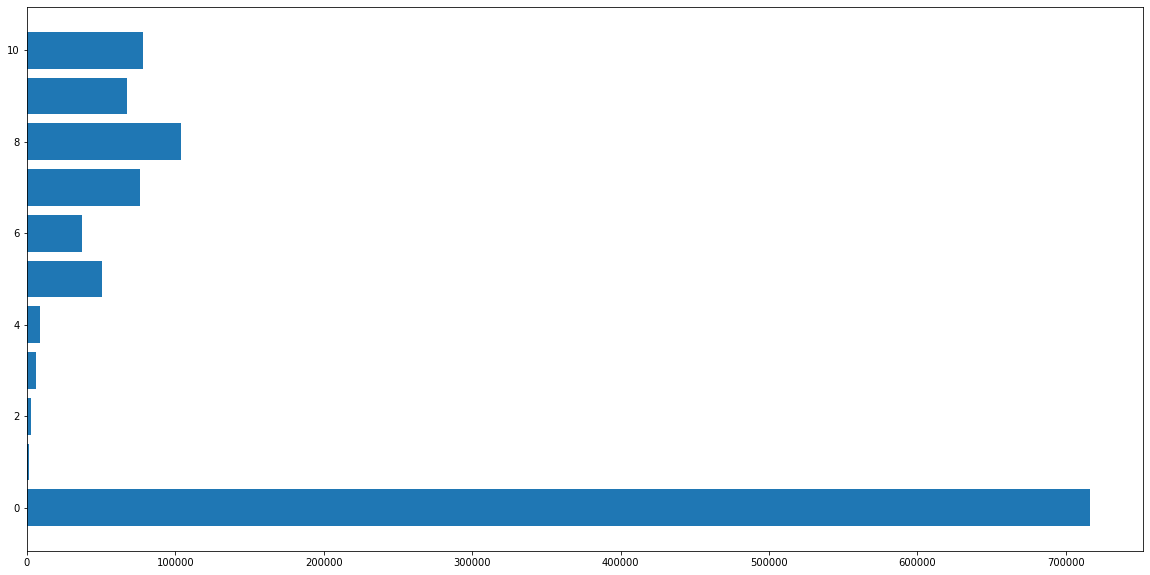

In [13]:
counts=df.bookRating.value_counts()
plt.figure(figsize=(20,10))
plt.barh(counts.index,counts.values)
plt.show()

### Distribution of Ratings per Book

In [14]:
book_ratings=df.groupby('ISBN')['bookRating'].count().clip(upper=50)

In [15]:
book_ratings.unique()

array([ 2,  1,  8,  5,  6, 14,  9,  3,  4, 13, 10, 15, 12, 19,  7, 17, 18,
       11, 24, 50, 33, 23, 26, 16, 39, 38, 30, 20, 22, 27, 46, 44, 42, 29,
       31, 21, 35, 28, 34, 37, 36, 49, 32, 41, 45, 43, 25, 48, 40, 47])

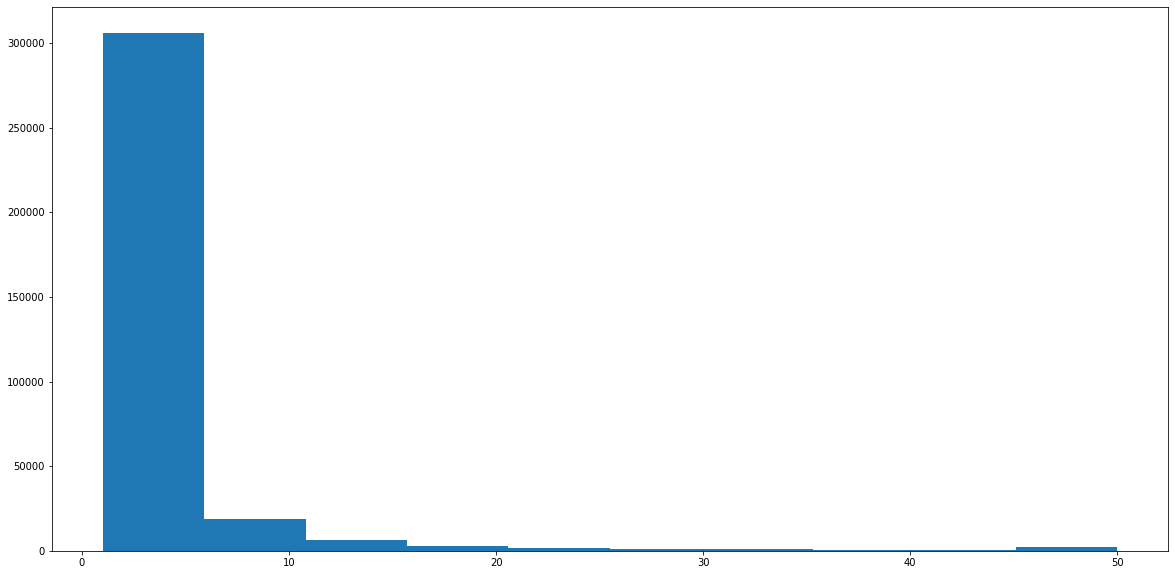

In [16]:
plt.figure(figsize=(20,10))
plt.hist(book_ratings)
plt.show()

### Distribution of Ratings per User

In [17]:
user_ratings=df.groupby('userID')['bookRating'].count().clip(upper=50)

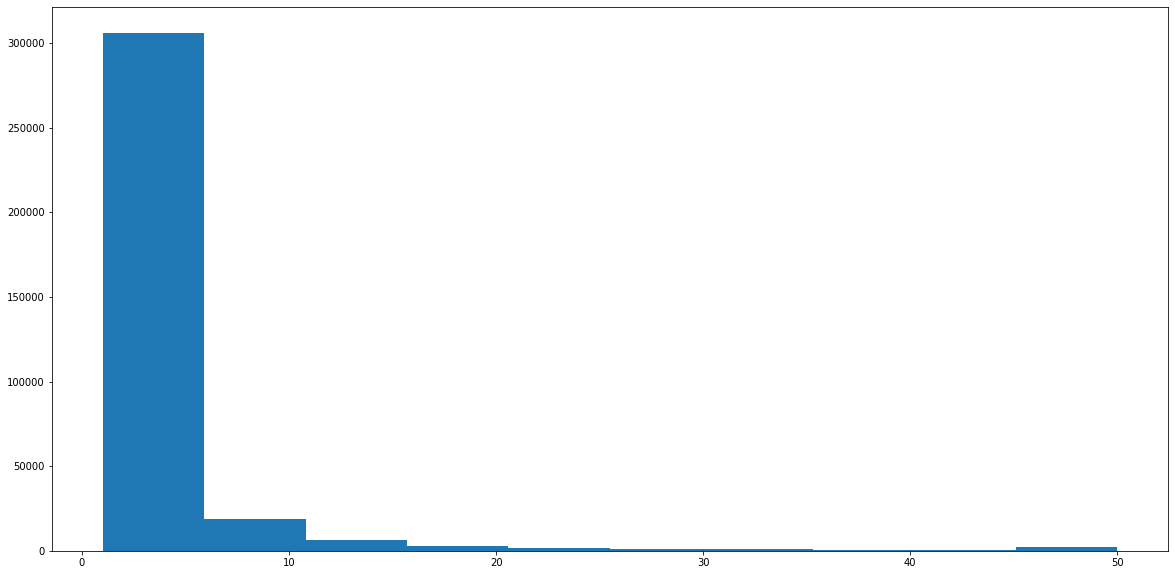

In [18]:
plt.figure(figsize=(20,10))
plt.hist(book_ratings)
plt.show()

### Set Threshold or filter values for users and ratings

#### set the threshold values to 50 for both user and ratings

In [19]:
min_book_ratings = 50
filter_books = df['ISBN'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 50
filter_users = df['userID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = df[(df['ISBN'].isin(filter_books)) & (df['userID'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(1149780, 3)
The new data frame shape:	(140516, 3)


### Create a pivot Table

In [92]:
df_all=pd.merge(df_new,books,on='ISBN',how='inner')
df=df_all[['userID','ISBN','bookRating','Book-Title']]

In [120]:
df.head()
idx='0060915544'
df.loc[df['ISBN']==idx]['Book-Title']
books[books['ISBN']==idx]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139355 entries, 0 to 139354
Data columns (total 4 columns):
userID        139355 non-null int64
ISBN          139355 non-null object
bookRating    139355 non-null int64
Book-Title    139355 non-null object
dtypes: int64(2), object(2)
memory usage: 5.3+ MB


In [121]:
df_pivot=df.pivot(index='ISBN',columns='userID',values='bookRating').fillna(0)

In [122]:
df_csr_matrix=csr_matrix(df_pivot.values)

### KNN Nearest Neighbours

In [123]:
from sklearn.neighbors import NearestNeighbors

In [124]:
knn_model=NearestNeighbors(metric='cosine',algorithm='brute')
knn_model.fit(df_csr_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [136]:
idx=1435
df.loc[df['userID']==1935]['Book-Title']

Series([], Name: Book-Title, dtype: object)

In [157]:
idx=np.random.choice(df_pivot.shape[0])
distances,indices = knn_model.kneighbors(df_pivot.iloc[idx,:].values.reshape(1,-1),n_neighbors=6)

for i in range(0, len(distances.flatten())):
    if i==0:
        #print(df_pivot.index[idx])
        title=df[df['ISBN']==str(df_pivot.index[idx])]['Book-Title'].unique()
        
        print('Recommendations for {0}:\n'.format(*title.flatten()))
    else:
        recc_title=df[df['ISBN']==str(df_pivot.index[indices.flatten()[i]])]['Book-Title'].unique()
        print('{0}: {1}, with distance of {2}:'.format(i,*recc_title.flatten(),distances.flatten()[i]))
        #print('{0}: {1}')
        

Recommendations for On the Road:

1: Free, with distance of 0.6922712725516682:
2: Bell Jar, with distance of 0.7144959609371002:
3: Don't Stand Too Close to a Naked Man, with distance of 0.7444915387249234:
4: Waiting, with distance of 0.7482028210593709:
5: Ahab's Wife: Or, The Star-Gazer: A Novel, with distance of 0.7497953872400289:


### Using Surprise library below

### Use Surprise.Dataset method to create a df to be used for recommender system by surprise library

In [20]:
reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(df_new[['userID', 'ISBN', 'bookRating']], reader)

### Check which method in Surprise will give best output

In [24]:
train,test=surprise.model_selection.train_test_split(data,test_size=0.3)

In [25]:
recommender = BaselineOnly()
predictions = recommender.fit(train)
predictions=predictions.test(test)
accuracy.rmse(predictions)
recommend=recommender.predict(uid="31919",iid='1558745718')
recommend


Estimating biases using als...
RMSE: 3.3670


Prediction(uid='31919', iid='1558745718', r_ui=None, est=2.744631056648832, details={'was_impossible': False})

In [26]:
user_prediction=recommender.predict(uid='31919',iid='105')
user_prediction.est
user_prediction

Prediction(uid='31919', iid='105', r_ui=None, est=2.344892792875225, details={'was_impossible': False})

### Some Predictions

In [27]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(train.ur[train.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(train.ir[train.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['userID', 'ItemID', 'rui', 'predicted_rating', 'details'])
df['#Items_Rated_by_User'] = df.userID.apply(get_Iu)
df['#Ratings_by_Users'] = df.ItemID.apply(get_Ui)
df['err'] = abs(df.predicted_rating - df.rui)
best_predictions = df.loc[df['err']>0.0].sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]
user_recommendation=list(df.groupby('userID')['ItemID'])

In [28]:
df.loc[df['userID']==212467]

,userID,ItemID,rui,predicted_rating,details,#Items_Rated_by_User,#Ratings_by_Users,err
7027,212467,0380001411,0.0,3.436027,{'was_impossible': False},19,43,3.436027
7491,212467,0515119644,5.0,2.236828,{'was_impossible': False},19,34,2.763172
14998,212467,0553290789,0.0,2.327070,{'was_impossible': False},19,38,2.327070
20270,212467,155874262X,5.0,3.853784,{'was_impossible': False},19,73,1.146216
28188,212467,0553582135,0.0,2.295498,{'was_impossible': False},19,67,2.295498
41050,212467,1558744630,0.0,3.261283,{'was_impossible': False},19,52,3.261283


In [ ]:
user_recommendation